# Analysis on Netflix Movies and TV Shows

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
sns.set_theme(style='darkgrid')

In [48]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
netflix_data_df = pd.read_csv('netflix_data.csv')
netflix_data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [63]:
netflix_data_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Data Preparation and Cleaning

In [64]:
netflix_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [65]:
netflix_data_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [66]:
netflix_data_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

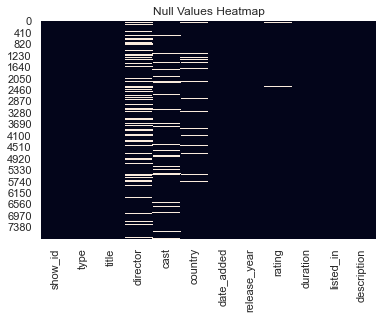

In [67]:
sns.heatmap(netflix_data_df.isna(),cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [68]:
netflix_data_df['director'].fillna('No Director',inplace = True)
netflix_data_df['cast'].fillna('No cast',inplace = True)
netflix_data_df['country'].fillna('Data unavailable',inplace = True)
netflix_data_df['cast'].fillna('No cast',inplace = True)
netflix_data_df.dropna(subset=['date_added','rating'],inplace=True)

In [69]:
netflix_data_df.isna().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

# Exploratory Analysis and Visualization

In [70]:
netflix_movies_df = netflix_data_df[netflix_data_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [71]:
netflix_series_df = netflix_data_df[netflix_data_df['type'] == 'TV Show']
netflix_series_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Data unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [72]:
netflix_movies_df.duration = netflix_movies_df.duration.astype(str).str.replace(' min','')
netflix_movies_df.duration.astype(int)
netflix_series_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_series_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_series_df.seasons = netflix_series_df.seasons.astype(str).str.replace(' Seasons','')
netflix_series_df.seasons.astype(int)

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: seasons, Length: 2398, dtype: int32

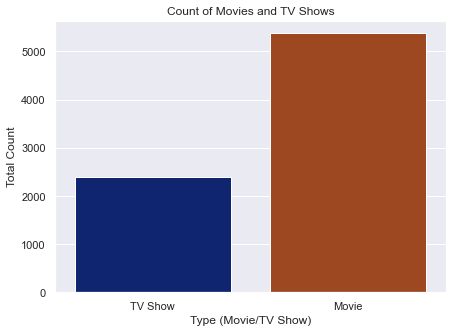

In [73]:
plt.figure(figsize=(7,5))
g = sns.countplot(x = netflix_data_df.type, palette="dark");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

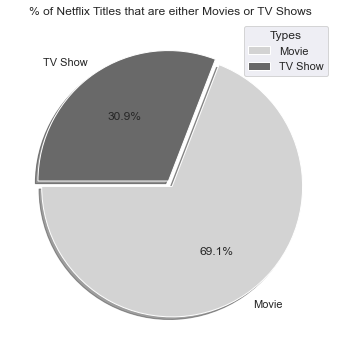

In [74]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_data_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_data_df.type.value_counts().index, colors=['lightgrey','dimgray'],shadow= True ,autopct='%.1f%%', startangle=180);
plt.legend(title='Types')
plt.show()

### Netflix Film Ratings


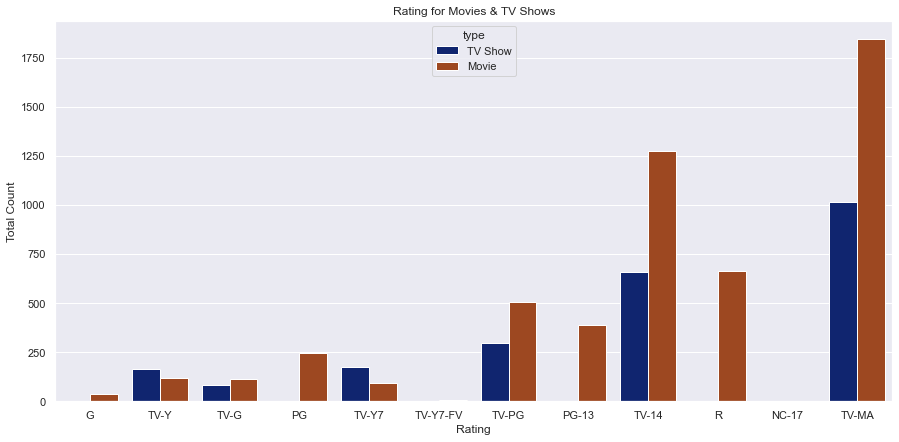

In [75]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
df = sns.countplot(x = netflix_data_df.rating, hue = netflix_data_df.type, order = order, palette = 'dark')
plt.title("Rating for Movies & TV Shows")
plt.xlabel('Rating')
plt.ylabel('Total Count');

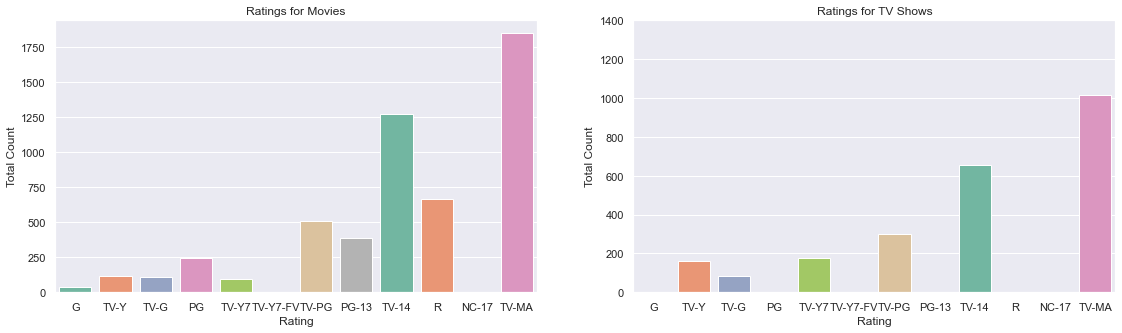

In [76]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(x = netflix_movies_df.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(x = netflix_series_df.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count");

In [77]:
netflix_data_df['year_added'] = pd.DatetimeIndex(netflix_data_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_series_df['year_added'] = pd.DatetimeIndex(netflix_series_df['date_added']).year
netflix_data_df['month_added'] = pd.DatetimeIndex(netflix_data_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_series_df['month_added'] = pd.DatetimeIndex(netflix_series_df['date_added']).month

### Content added each year

In [78]:
years_df = netflix_data_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
years_df = years_df[years_df.year != 2021]
years_df.sort_values('year',ascending = False,inplace = True)
years_df

,year,count
1,2020,2009
0,2019,2153
2,2018,1684
3,2017,1222
4,2016,440
6,2015,88
7,2014,25
9,2013,11
10,2012,3
8,2011,13


In [79]:
data_years_df = netflix_data_df[['type','year_added']]
movie_years_df = data_years_df[data_years_df['type'] == 'Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
movie_years_df = movie_years_df[movie_years_df.year != 2021]
movie_years_df.sort_values('year',inplace= True)
series_years_df = data_years_df[data_years_df['type'] == 'TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
series_years_df = series_years_df[series_years_df.year != 2021]
series_years_df.sort_values('year',inplace= True)

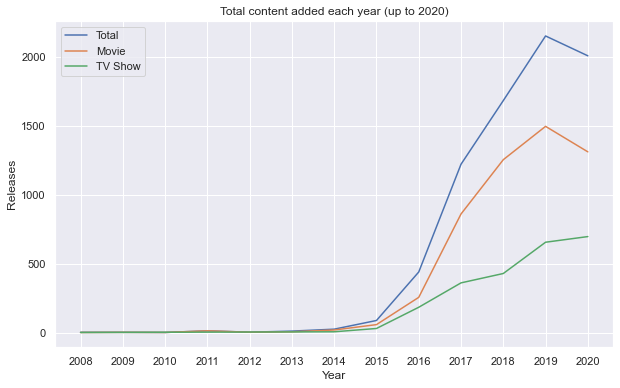

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=years_df, x='year', y='count')
sns.lineplot(data=movie_years_df, x='year', y='count')
sns.lineplot(data=series_years_df, x='year', y='count')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Total content added each year (up to 2020)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

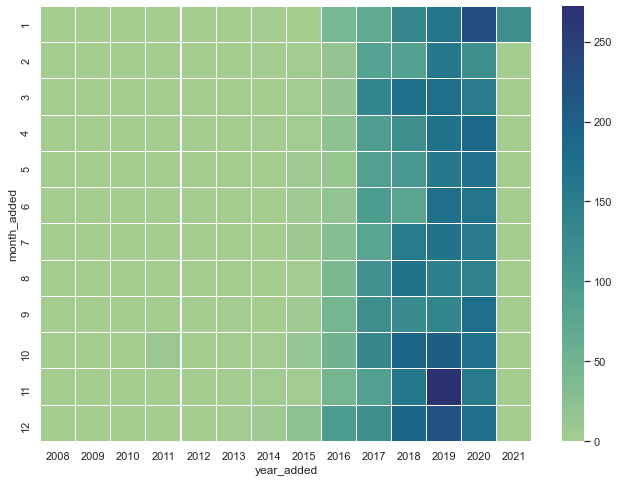

In [81]:
plt.figure(figsize=(11,8))
month_year_df = netflix_data_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
ht = sns.heatmap(month_year_df,linewidths=0.025, cmap=('crest'))

### Netflix Film Duration

Text(0.5, 0, 'Seasons')

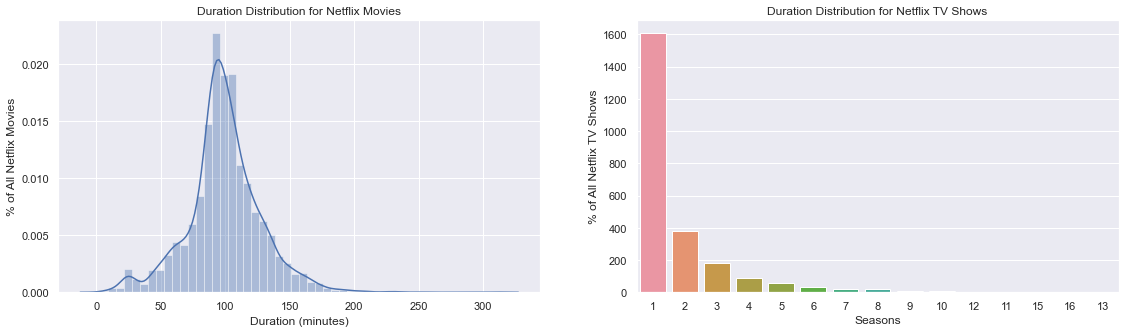

In [82]:
fig,ax = plt.subplots(1,2,figsize=(19,5))
tb1 = sns.distplot(x = netflix_movies_df['duration'],ax = ax[0])
tb1.set_title("Duration Distribution for Netflix Movies")
tb1.set_ylabel("% of All Netflix Movies")
tb1.set_xlabel("Duration (minutes)")
tb2 = sns.countplot(x = netflix_series_df['seasons'],order = netflix_series_df['seasons'].value_counts().index,ax = ax[1])
tb2.set_title("Duration Distribution for Netflix TV Shows")
tb2.set_ylabel("% of All Netflix TV Shows")
tb2.set_xlabel("Seasons")



### Countries with the most content available

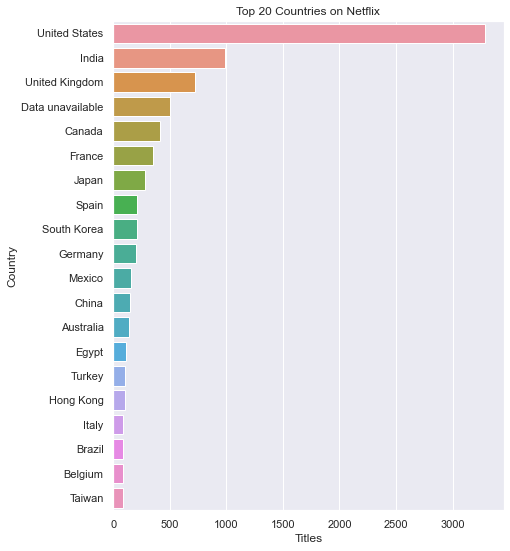

In [83]:
filtered_countries = netflix_data_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

### Popular Genres

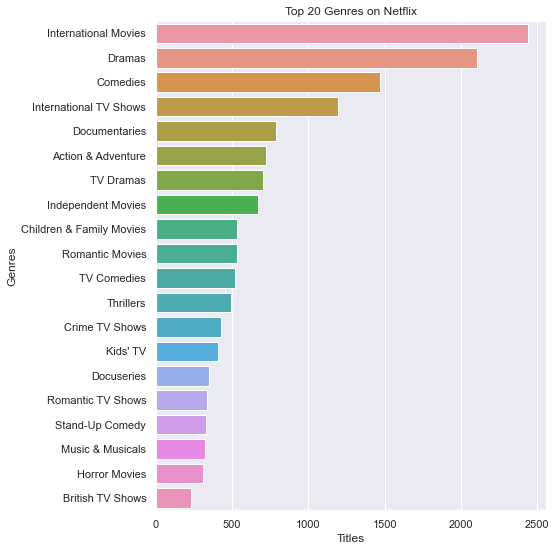

In [84]:
filtered_genres = netflix_data_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

# Asking and Answering Questions

### Who are the top 10 directors on Netflix with the most releases?

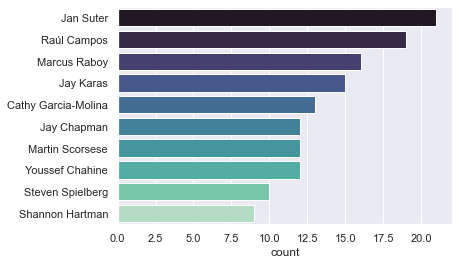

In [85]:
filtered_directors = netflix_data_df[netflix_data_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

### Who are the top 10 actors on Netflix based on number of titles?

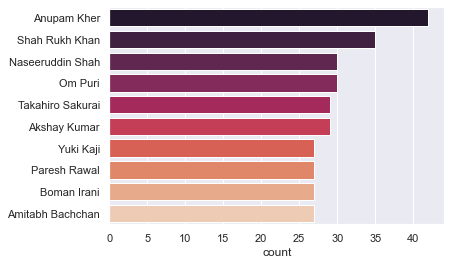

In [86]:
filtered_cast = netflix_data_df[netflix_data_df.cast != 'No cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

### How does the timeline look like for the addition of International Movies compared to International TV Shows?

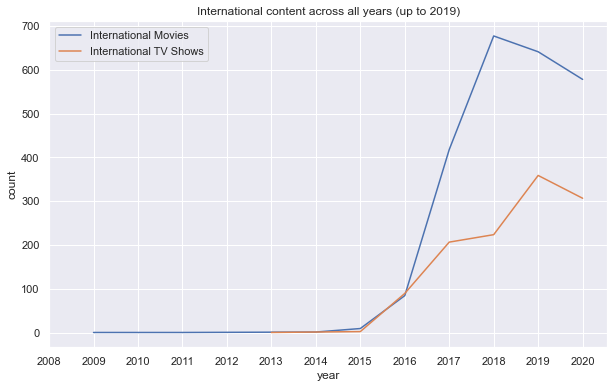

In [87]:
international_movies = netflix_data_df[netflix_data_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2021]

international_shows = netflix_data_df[netflix_data_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2021]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2021, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

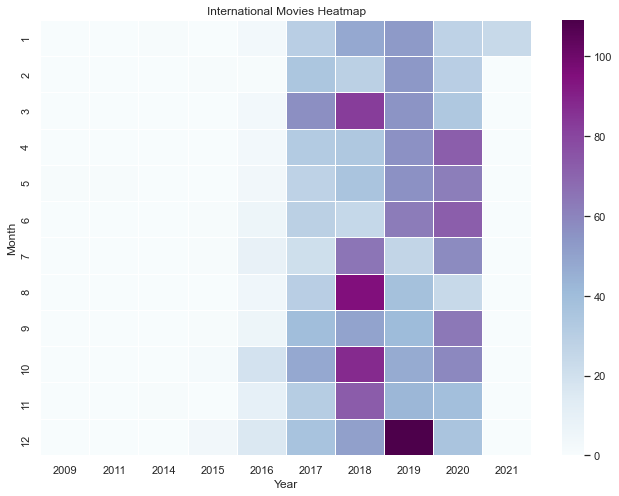

In [88]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

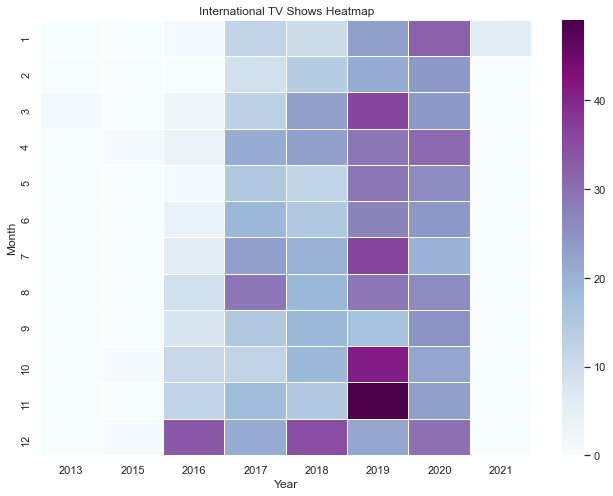

In [89]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

# Inferences and Conclusion
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

# References
* https://www.kaggle.com/shivamb/netflix-shows
* https://www.businessinsider.com/netflix-growth-comes-from-international-markets-2019-10